# 🔲    **Анализ онлайн сервиса на примере Netflix**

# **Раздел 1: Импорт библиотек и установка цветовых параметров**

In [ ]:
# Подключение необходимых библиотек
import pandas as pd                 # Библиотека для работы с данными в виде таблиц (DataFrame)
from IPython.display import display # Для отображения DataFrame в красивом формате таблицы (замена print) / display(dataframe)
from datetime import datetime       # Модуль для работы с датами и временем
import numpy as np                  # Библиотека для работы с массивами и числовыми данными

# Установка стиля для графиков
import seaborn as sns               # Библиотека для улучшенной визуализации данных на основе matplotlib
import matplotlib.pyplot as plt     # Библиотека для создания графиков и визуализаций

sns.set_style("whitegrid")          # Фон графика белый, График имеет сетку, Четкость

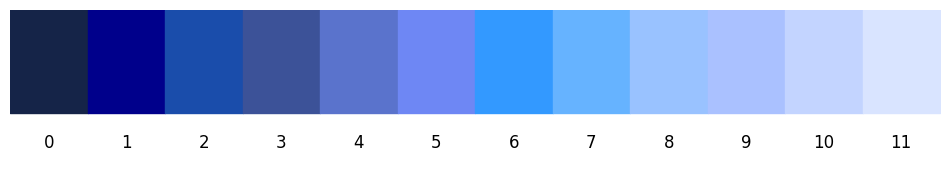

In [ ]:
# ЦВЕТОВАЯ ПОЛИТРА ГРАФИКОВ
# Палитра цветов с индексами
contrast_colors = [
    '#152448',  # 0 Глубокий темный синий
    '#00008B',  # 1 Классический темный синий
    '#1A4DAB',  # 2 Тёмно-индиго (новый)
    '#3c5298',  # 3 Глубокий синий
    '#5A73CC',  # 4 Умеренно-синий (новый)
    '#6e87f4',  # 5 Светло-синий
    '#3399ff',  # 6 Темный синий (новый)
    '#66b3ff',  # 7 Яркий синий
    '#99c2ff',  # 8 Светлый синий
    '#aac1ff',  # 9 Нежно-голубой
    '#c3d4ff',  # 10 Ледяной голубой
    '#d9e4ff'  # 11 Пастельный голубой

]
# (СПРАВОЧНО) color='orangered',  # Явно укажим иной контрастный цвет для другого графика

# Устанавливаем размер фигуры
plt.figure(figsize=(12, 2))

# Цикл по каждому цвету для отрисовки квадратов с индексами
for i, color in enumerate(contrast_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)  # Рисуем цветной прямоугольник
    plt.text(i + 0.5, -0.3, str(i), ha='center', va='center', fontsize=12, color='black')  # Индекс под цветом

# Настройка осей
plt.xlim(0, len(contrast_colors))
plt.ylim(-0.5, 1)
plt.axis('off')  # Убираем оси

# Показ графика
plt.show()


# **Раздел 2: Обработка исходного файла для целей анализа**

1.  Полчение источника информации;
2.  Примененим стиль CamelCase (соединение слов через подчеркивание) используем для удобства работы с переменными;
3.  Проверим и устраним наличие пустых ячеек (значения) или пропусков;
4.  Формат даты если он имеет вид Объета (object), переведем в формат даты datetime;
5.  Дополним данные дополнительной колонкой определяемой как месяца пользования сервисом, расчитанной как разность даты последнего платежа и датой регистрации  в сервисе каждого клиента

##1 . Получение источника информации

Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)



In [ ]:
# Загружаем данные файла netflix_users_data.csv
df = pd.read_csv('/content/drive/MyDrive/Курс Аналитик данных по Python от ZERO/PN14.Кейсы_в портфолио/netflix_users_data.csv')

# Проверим первые 5 строк для общего понимания структуры данных
df.head()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
# Получим именам всех колонок в DataFrame
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [ ]:
# Получаем информацию о DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


##2 . Приведение столбцов к стилю snake_case

Приведение названия колонок к стилю snake_case — это единое преобразование название колонок для удобства последующего анализа, при использовании Python для переменных и функций

при котором:
- слова преобразуются в нижний регистр
- пробелы между слов заменяются на подчеркивания

Результат обработки сохраняем в новое название df_snake_case

Это позволяет избежать путаницы, и код остаётся чистым

In [ ]:
# Функция для автоматического преобразования названий колонок в snake_case (стиль написания)
def snake_case(s):
    return s.lower().replace(' ', '_')  # Преобразуем в нижний регистр и заменяем пробелы на подчеркивания

# Применим к каждому названию столбца, используем метод rename() с функцией lambda
df_snake_case = df.rename(columns=lambda x: snake_case(x))

# Проверим результат
print("Измененные названия колонок в стиле snake_case:")
print(df_snake_case.columns)


Измененные названия колонок в стиле snake_case:
Index(['user_id', 'subscription_type', 'monthly_revenue', 'join_date',
       'last_payment_date', 'country', 'age', 'gender', 'device',
       'plan_duration'],
      dtype='object')


##3 . Поиск дублей и пропусков в данных и их обработка





In [ ]:
# Поиск дублей по всем колонкам
duplicate_rows = df_snake_case[df.duplicated()]
print("Количество дублей по всем колонкам:", duplicate_rows.shape[0])
print("Дублирующиеся строки:")
print(duplicate_rows)

# Поиск пропусков в данных
missing_values = df.isnull().sum()
print("\nПропуски в данных по колонкам:")
print(missing_values[missing_values > 0])


Количество дублей по всем колонкам: 0
Дублирующиеся строки:
Empty DataFrame
Columns: [user_id, subscription_type, monthly_revenue, join_date, last_payment_date, country, age, gender, device, plan_duration]
Index: []

Пропуски в данных по колонкам:
Series([], dtype: int64)


##4 . Преобразование даты

In [ ]:
# Приводим столбцы с датами к формату datetime, задав конкретный формат
df_snake_case['join_date'] = pd.to_datetime(df_snake_case['join_date'], format='%d-%m-%y', errors='coerce')
df_snake_case['last_payment_date'] = pd.to_datetime(df_snake_case['last_payment_date'], format='%d-%m-%y', errors='coerce')

# Проверим результаты преобразования
df_snake_case[['join_date', 'last_payment_date']].head()

,join_date,last_payment_date
0,2022-01-15,2023-06-10
1,2021-09-05,2023-06-22
2,2023-02-28,2023-06-27
3,2022-07-10,2023-06-26
4,2023-05-01,2023-06-28


In [ ]:
# Получаем начальную и конечную даты без времени
start_date = df_snake_case['last_payment_date'].min().date()
end_date = df_snake_case['last_payment_date'].max().date()

# Выводим начальную и конечную даты
print(f"Начальная дата: {start_date}")
print(f"Конечная дата: {end_date}")

Начальная дата: 2023-06-10
Конечная дата: 2023-07-15


##5 . Создание дополнительного список месяцев для каждого клиента

Создаем колонку 'months_between', которая содержит список месяцев для каждого клиента

In [ ]:
# Функция для получения всех месяцев между двумя датами
def get_months_between_dates(start_date, end_date):
    if pd.notnull(start_date) and pd.notnull(end_date) and start_date <= end_date:
        monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')  # Начало месяца
        return [date.strftime('%Y-%m') for date in monthly_dates]
    else:
        return []

# Добавляем колонку с месяцами использования
df_snake_case['months_between'] = df_snake_case.apply(
    lambda row: get_months_between_dates(row['join_date'], row['last_payment_date']), axis=1
)

df_snake_case.info()
# Здесь у нас будет колонка 'months_between', которая содержит список месяцев для каждого клиента


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2500 non-null   int64         
 1   subscription_type  2500 non-null   object        
 2   monthly_revenue    2500 non-null   int64         
 3   join_date          2500 non-null   datetime64[ns]
 4   last_payment_date  2500 non-null   datetime64[ns]
 5   country            2500 non-null   object        
 6   age                2500 non-null   int64         
 7   gender             2500 non-null   object        
 8   device             2500 non-null   object        
 9   plan_duration      2500 non-null   object        
 10  months_between     2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 215.0+ KB


In [ ]:
df_snake_case.head()

,user_id,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,plan_duration,months_between
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,"[2022-02, 2022-03, 2022-04, 2022-05, 2022-06, ..."
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,"[2021-10, 2021-11, 2021-12, 2022-01, 2022-02, ..."
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,"[2023-03, 2023-04, 2023-05, 2023-06]"
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,"[2022-08, 2022-09, 2022-10, 2022-11, 2022-12, ..."
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,"[2023-05, 2023-06]"


**Вывод по результатам обработки файла:**

---
**Анализируемы файл:**
В анализируемом файле период данных представлен:
- Начальная дата: 2023-06-10
- Конечная дата: 2023-07-15

**Количество записей:**
В таблице 2500 записей (строк), что
достаточно для проведения анализа.

**Пропущенные значения:** Пропущенных данных нет, так как все колонки имеют по 2500 непустых значений.

**Колонки и типы данных:**
- Три колонки — числовые (int64):
"ID пользователя" (User ID), "Ежемесячный доход" (Monthly Revenue), "Возраст" (Age).
- Семь колонок имеют тип object (строковые данные):
"Тип подписки" (Subscription Type), "Дата регистрации" (Join Date), "Дата последнего платежа" (Last Payment Date), "Страна" (Country), "Пол" (Gender), "Устройство" (Device), "Длительность плана" (Plan Duration).

**Типы данных для дат:**
Поля "Дата регистрации" (Join Date) и "Дата последнего платежа" (Last Payment Date) имеют тип object, но это даты. Для корректного анализа времени они преобразованы в тип данных datetime (datetime64[ns]).

Поля с текстовой информацией: Колонки, такие как "Тип подписки", "Страна", "Пол", и "Устройство", содержат категориальные данные (ограниченный набор уникальных значений), что пригодится для их анализа.

Для целей дальнейшего анализа данных вычислили месяца пользования сервисом каждым клиентом.



# **Раздел 3: Исследовательский анализ данных**

##1 . Уникальные пользователи

Такой анализ полезен для проверки уникальности значений, помогает обнаружить дубликаты.

Используем метод nunique(), который подсчитает количество уникальных значений в колонке "id_пользователя".


In [ ]:
# Подсчитаем количество уникальных пользователей по колонку "id_пользователя"
unique_users_count = df_snake_case['user_id'].nunique()

# Выведем результат
print(f'Количество уникальных пользователей: {unique_users_count}')


Количество уникальных пользователей: 2500


##2 . Возраст пользователей

Для анализа возраста пользователей выполним следующие действия:

- Вычислим основные статистические показатели: среднее, медиану, минимум и максимум.
- Для визуализации построим график "ящик с усами" который визуализирует, как распределены данные по возрасту:

Медиана укажет, где находится центральное значение возраста.
Усы покажут разброс данных, а также выбросы (отдельные точки на графике), если они присутствуют.

Статистические показатели возраста:
count   2500.00
mean      38.80
std        7.17
min       26.00
25%       32.00
50%       39.00
75%       45.00
max       51.00


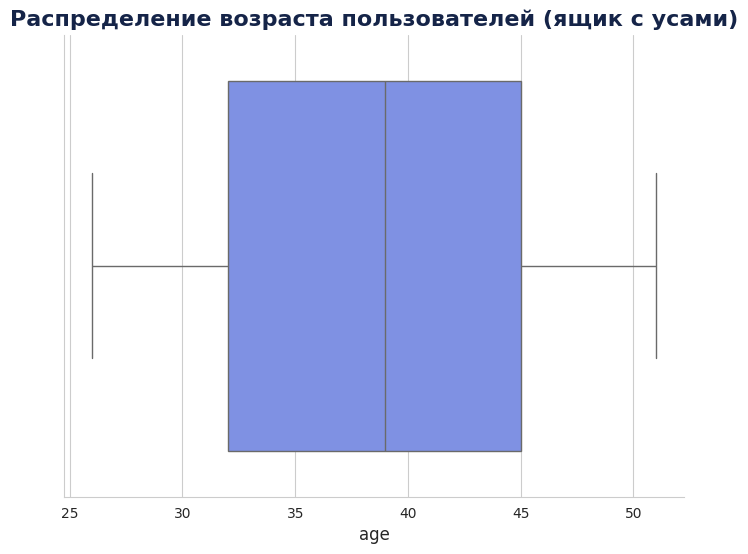

In [ ]:
# Выведем основные статистические показатели по возрасту пользователей
# Метод describe() вернёт такие показатели, как: среднее значение, стандартное отклонение, минимум, максимум и квартили.
age_stats = df_snake_case['age'].describe()

# Построим график "ящик с усами" для возраста пользователей с выбранным цветом из палитры
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_snake_case['age'], color=contrast_colors[5])  # Используем светло-синий из палитры

# Добавляем заголовок и подписи осей
plt.title('Распределение возраста пользователей (ящик с усами)', fontsize=16, fontweight='bold', color=contrast_colors[0])
plt.xlabel('age', fontsize=12)

# Убираем рамку графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

print("Статистические показатели возраста:")
print(age_stats.to_string(index=True, float_format='%.2f'))

# Отображаем график
plt.show()


**Вывод по возрасту клиентов:**

---
Возраст пользователей колеблется от 26 до 51 года, с сосредоточением большинства пользователей в возрасте около 39 лет.
Данные показывают, что сервис в основном привлекает пользователей в возрасте от 32 до 45 лет, что может быть важным для определения целевой аудитории и разработки маркетинговых стратегий.

##3 . Изучение пола пользователей

- Подсчитаем количество пользователей по гендерной принадлежности.
- Построим круговую диаграмму для визуализации распределения пола пользователей.

Количество мужчин: 1243
Количество женщин: 1257
Общее количество пользователей: 2500


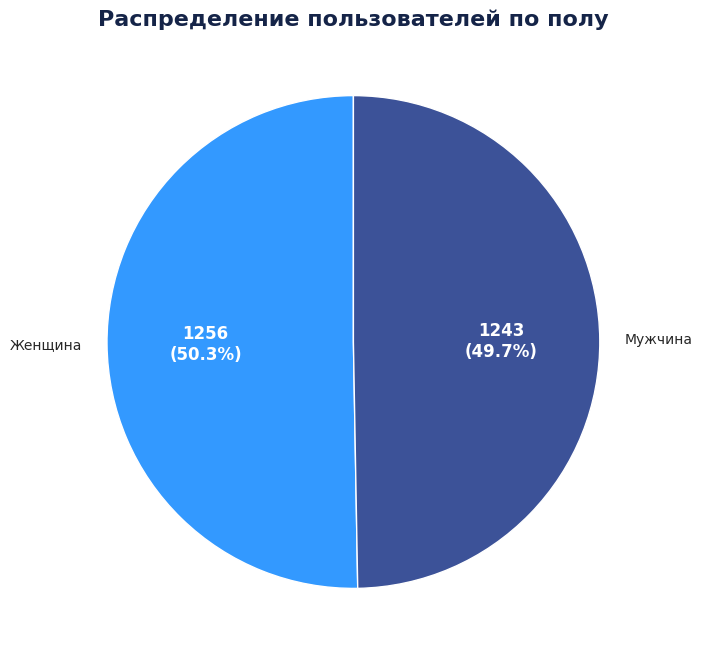

In [ ]:
# Подсчитаем количество мужчин и женщин
gender_counts = df_snake_case['gender'].value_counts()

# Преобразуем английские названия в русские
gender_counts.index = gender_counts.index.map({
    'Male': 'Мужчина',
    'Female': 'Женщина'
})

# Выводим подсчитанные значения
print("Количество мужчин:", gender_counts.get('Мужчина', 0))  # Подсчет количества мужчин
print("Количество женщин:", gender_counts.get('Женщина', 0))  # Подсчет количества женщин

# Проверяем общее количество
total_users = gender_counts.sum()
print("Общее количество пользователей:", total_users)  # Общее количество пользователей

# Функция для форматирования подписей
def autopct_format(pct):
    absolute = int(pct * total_users / 100)
    return f'{absolute}\n({pct:.1f}%)'  # Подпись в процентах и абсолютных значениях

# Построение круговой диаграммы с использованием палитры контрастных оттенков синего
plt.figure(figsize=(8, 8))  # Определяем размер графика
wedges, texts, autotexts = plt.pie(gender_counts,
                                   labels=gender_counts.index,  # Метки для круговой диаграммы
                                   autopct=autopct_format,  # Формат меток с процентах и абсолютными значениями
                                   startangle=90,  # Начальный угол
                                   colors=[contrast_colors[6], contrast_colors[3]],  # Используем выбранные цвета
                                   wedgeprops={'edgecolor': 'white'})  # Белая рамка вокруг каждого сектора

# Настраиваем подписи внутри диаграммы
for autotext in autotexts:
    autotext.set_color('white')  # Белый цвет текста
    autotext.set_fontweight('bold')  # Жирный шрифт
    autotext.set_fontsize(12)  # Размер шрифта

plt.title('Распределение пользователей по полу', fontsize=16, fontweight='bold', color=contrast_colors[0])  # Заголовок диаграммы
plt.show()  # Отображение графика


In [ ]:
# Проверяем на наличие пропусков (проверка связана с различием в подсчете количества на графике и статистики)
print(df_snake_case['gender'].isnull().sum())


0


**Вывод пол пользователя:**

---
На основе анализа данных о пользователях Netflix, общее количество мужчин составляет 1243, в то время как количество женщин составляет 1257. Это указывает на практически равное распределение пользователей по полу, с небольшим преобладанием женщин. Данная информация может быть полезна для дальнейшего анализа, например, для изучения различий в поведении пользователей в зависимости от пола или для адаптации маркетинговых стратегий.

Такое равномерное распределение пользователей может также указывать на необходимость учета различных предпочтений и потребностей обоих полов при разработке контента и услуг.

##4 . Девайсы пользователей

- Подсчитаем количество пользователей Netflix по типу устройства.
- Построим столбчатую диаграмму для визуализации распределения устройств.

Итого по устройствам:
device
Ноутбук            636
Планшет            633
Смартфон           621
Смарт-телевизор    610
Name: count, dtype: int64


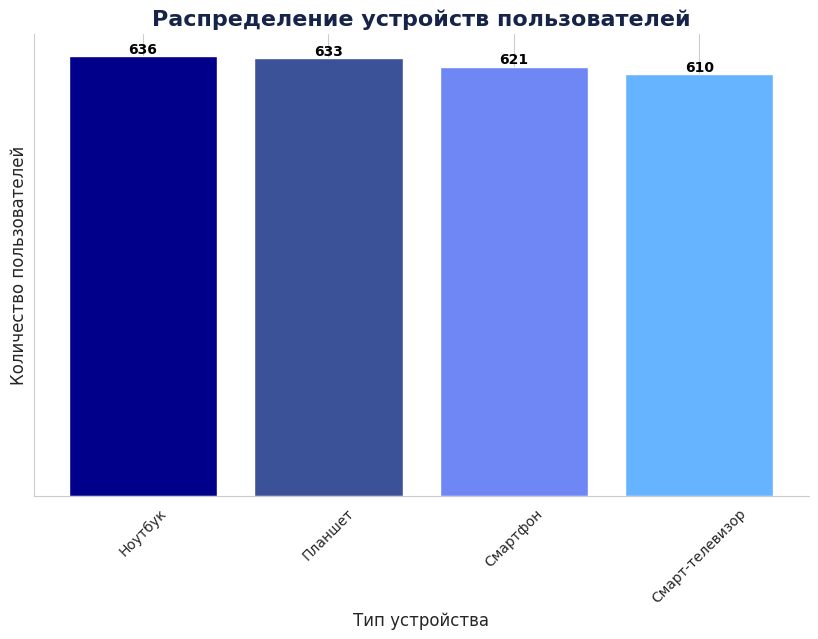

In [ ]:
# Подсчет количества каждого устройства
device_counts = df_snake_case['device'].value_counts()

# Преобразуем английские названия в русские
device_counts.index = device_counts.index.map({
    'Laptop': 'Ноутбук',
    'Tablet': 'Планшет',
    'Smartphone': 'Смартфон',
    'Smart TV': 'Смарт-телевизор'
})

# Построение столбчатой диаграммы с использованием контрастной палитры
# Использует plt.bar функцию из стандартного модуля matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(device_counts.index, device_counts.values, color=[contrast_colors[1], contrast_colors[3], contrast_colors[5], contrast_colors[7]])

# Добавление подписей над столбцами
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', color='black', fontweight='bold')

# Добавляем подписи и заголовки
plt.title('Распределение устройств пользователей', fontsize=16, fontweight='bold', color=contrast_colors[0])
plt.xlabel('Тип устройства', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# Поворачиваем метки на оси X для удобочитаемости
plt.xticks(rotation=45)

# Убираем рамку графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Скрываем метки оси Y, если они не нужны
plt.yticks([])

# Вывод результатов
print("Итого по устройствам:")
print(device_counts)

# Показываем график
plt.show()


**Вывод девайсы пользователя:**

---
На основе проведенного анализа устройств пользователей Netflix, мы получили следующие данные о распределении пользователей по типам устройств:

- Ноутбук: 636 пользователей
- Планшет: 633 пользователя
- Смартфон: 621 пользователь
- Умный телевизор: 610 пользователей

Таким образом, ноутбуки и планшеты занимают наибольшую долю среди используемых устройств, с небольшим отрывом от смартфонов и умных телевизоров.

**Заключение:**
Такое распределение может говорить о предпочтениях пользователей в использовании более крупных экранов для просмотра контента, что делает ноутбуки и планшеты популярными устройствами. Тем не менее, значительное количество пользователей также использует смартфоны и умные телевизоры, что указывает на разнообразие в устройствах и возможностях для Netflix адаптировать свой контент и пользовательский интерфейс под разные форматы и платформы.

##5 . Тип подписки пользователей

- Подсчием количество пользователей по каждому типу подписки и времени использования.
- Визуализируем результаты с помощью линейного графика.

Количество записей по типам подписки:
subscription_type
Базовый     999
Стандарт    768
Премиум     733
Name: count, dtype: int64


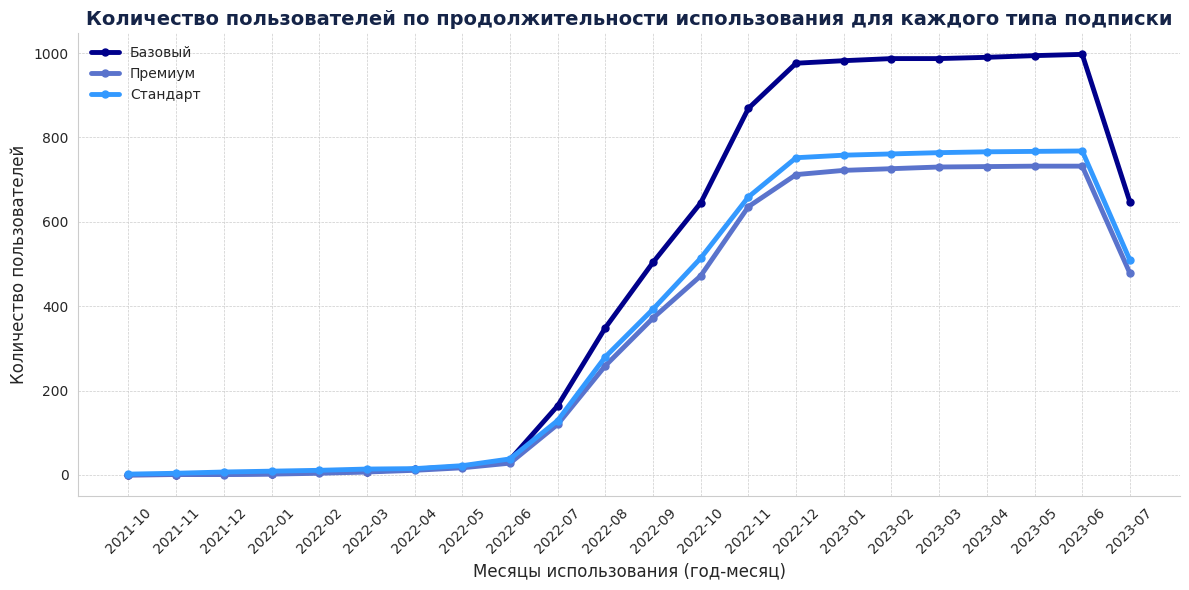

In [ ]:
# Подсчет количества записей для каждого типа подписки
subscription_counts = df_snake_case['subscription_type'].value_counts()

# Преобразуем названия типов подписки на русский (единовременная операция)
if df_snake_case['subscription_type'].isin(['Basic', 'Standard', 'Premium']).any():
    df_snake_case['subscription_type'] = df_snake_case['subscription_type'].map({
        'Basic': 'Базовый',
        'Standard': 'Стандарт',
        'Premium': 'Премиум'
    })

# Группируем данные по месяцам и типу подписки для расчета количества уникальных пользователей
# Используем колонку 'months_between' из df_snake_case для анализа по типам подписки - ВЫЧИСЛЕННЫЙ РАНЕЕ ПРИ ПОДГОТОВКЕ ФАЙЛА
monthly_user_counts = df_snake_case.explode('months_between').groupby(['months_between', 'subscription_type']).agg(
    user_count=('user_id', 'nunique')
).reset_index()

# Построение линейного графика количества пользователей по продолжительности использования для каждого типа подписки
plt.figure(figsize=(12, 6))

# Группировка данных для подсчета пользователей по месяцам и типам подписки
usage_counts = monthly_user_counts.pivot(index='months_between', columns='subscription_type', values='user_count').fillna(0)

# Построение линейного графика
usage_counts.plot(
    kind='line',
    linewidth=3.5,  # Устанавливаем толщину линии
    marker='o',
    markersize=5,
    color=[contrast_colors[1], contrast_colors[4], contrast_colors[6]],  # Настраиваем цвета для каждой линии
    ax=plt.gca()
)

# Настройка оси X для отображения в формате "год-месяц"
plt.xticks(
    ticks=np.arange(0, len(usage_counts), 1),  # Устанавливаем шаг для оси X
    labels=usage_counts.index,
    rotation=45
)

# Установка заголовка и подписей осей
plt.title('Количество пользователей по продолжительности использования для каждого типа подписки',
          fontsize=14, fontweight='bold', color=contrast_colors[0])
plt.xlabel('Месяцы использования (год-месяц)', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# Убираем верхнюю и правую границы графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Настройка легенды
plt.legend(frameon=False)  # Убираем рамку в легенде

# Добавляем пунктирные линии сетки
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Вывод статистики
print("Количество записей по типам подписки:")
print(subscription_counts)

# Показать график
plt.tight_layout()  # Уплотнение графика для лучшего отображения
plt.show()


subscription_type
Базовый     999
Стандарт    768
Премиум     733
Name: count, dtype: int64


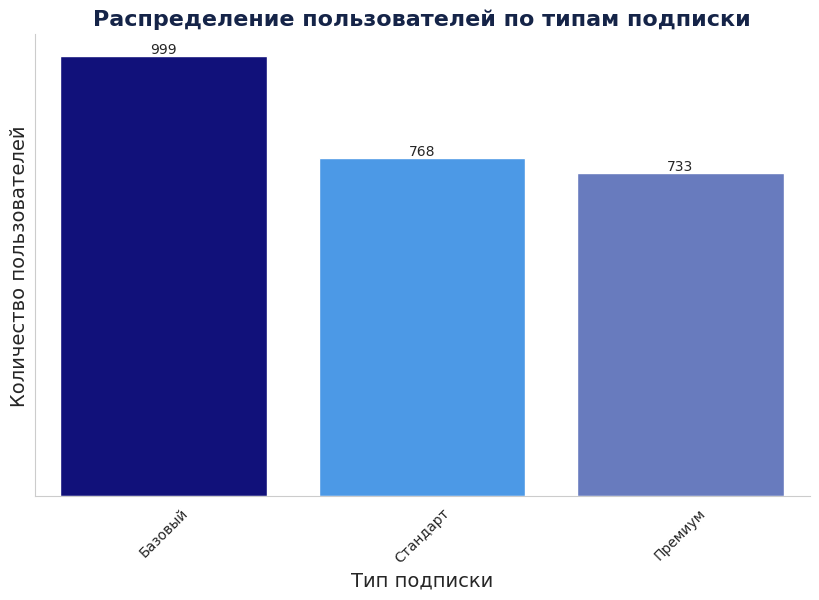

In [ ]:
# Построение столбчатой диаграммы с указанием цветов и отключенной легендой
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=subscription_counts.index, y=subscription_counts.values,
                   hue=subscription_counts.index,
                   palette=[contrast_colors[1], contrast_colors[6], contrast_colors[4]],
                   dodge=False, legend=False)

# Добавляем подписи над столбцами
for bar in bars.patches:
    yval = bar.get_height()  # Получаем высоту столбца
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')  # Добавляем текст над столбцом

# Настройка графика
plt.title('Распределение пользователей по типам подписки', fontsize=16, fontweight='bold', color=contrast_colors[0])
plt.xlabel('Тип подписки', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.xticks(rotation=45)  # Поворачиваем метки оси X для лучшей читаемости

# Убираем рамку графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Скрываем метки оси Y, если они не нужны
plt.yticks([])

# Выводим подсчитанные значения
print(subscription_counts)

# Отображаем график
plt.show()


**Вывод по типу подписки:**

---
На основе проведенного анализа типов подписки пользователей Netflix, мы получили следующие данные о распределении пользователей:

- Базовая подписка (Basic): 999 пользователей
- Стандартная подписка (Standard): 768 пользователей
- Премиум подписка (Premium): 733 пользователя

**Заключение:**
Наиболее популярной является базовая подписка, которая привлекла наибольшее количество пользователей. Стандартная и премиум подписки имеют схожее количество пользователей, при этом стандартная подписка немного превосходит премиум. Это может указывать на то, что многие пользователи предпочитают доступную базовую версию, в то время как меньшая часть пользователей готова платить больше за дополнительные преимущества.

Снижение всех типов подписки с июня 2023 г. сидетельствует о вероятной системной проблеме сервиса и требует дополнительного анализа маркетинговой политики.

Анализ типов подписки помогает Netflix понять предпочтения своей аудитории и может служить основой для дальнейшего улучшения предложений.

##6 . Локация пользователей

Для изучения локации пользователей:

- Подсчитаем количество пользователей по странам.
- Визуализируем результаты с помощью графика.

country
США               451
Испания           451
Канада            317
Великобритания    183
Австралия         183
Германия          183
Франция           183
Бразилия          183
Мексика           183
Италия            183
Name: count, dtype: int64


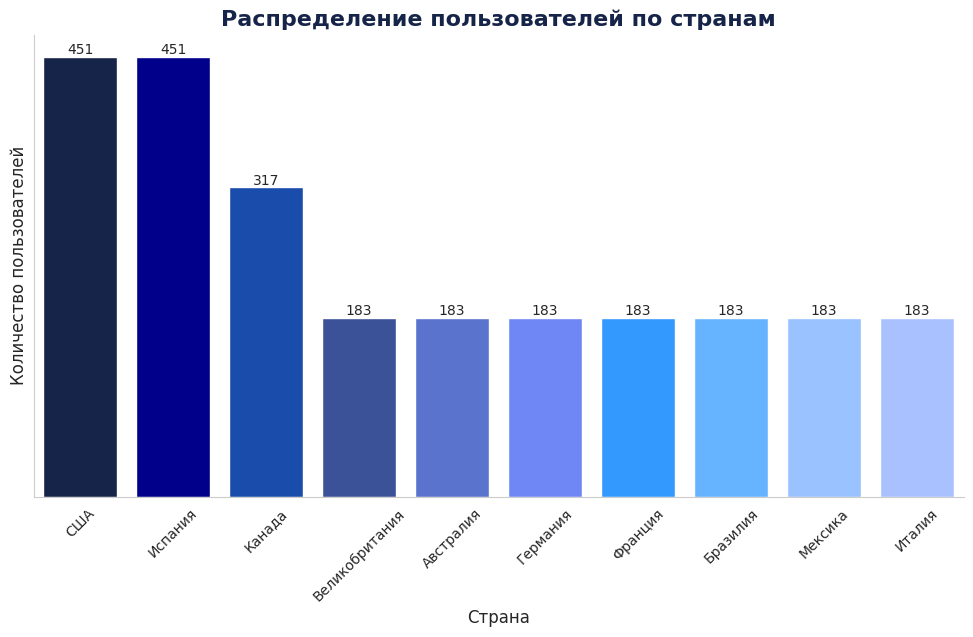

In [ ]:
# Подсчет количества пользователей по странам
country_counts = df_snake_case['country'].value_counts()

# Преобразуем английские названия в русские
country_counts.index = country_counts.index.map({
    'United States': 'США',
    'Spain': 'Испания',
    'Canada': 'Канада',
    'United Kingdom': 'Великобритания',
    'Australia': 'Австралия',
    'Germany': 'Германия',
    'France': 'Франция',
    'Brazil': 'Бразилия',
    'Mexico': 'Мексика',
    'Italy': 'Италия'

})

# Создаем столбчатую диаграмму для визуализации локации пользователей
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=country_counts.index, y=country_counts.values)

# Прямо задаем цвет для каждого столбца в порядке убывания
for i, bar in enumerate(bars.patches):
    bar.set_facecolor(contrast_colors[i % len(contrast_colors)])  # Задаем цвет по порядку

# Добавляем подписи над столбцами
for bar in bars.patches:
    yval = bar.get_height()  # Получаем высоту столбца
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')  # Добавляем текст над столбцом

# Настройка графика
plt.title('Распределение пользователей по странам', fontsize=16, fontweight='bold', color=contrast_colors[0])
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)  # Поворачиваем метки оси X для лучшей читаемости

# Убираем рамку графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Скрываем метки оси Y, если они не нужны
plt.yticks([])

# Выводим подсчитанные значения
print(country_counts)

# Отображаем график
plt.show()


**Вывод по локации пользователей:**

---
США и Испания имеют наибольшее количество пользователей, по 451 человеку в каждой стране. Это может свидетельствовать о высоком уровне интереса к продукту или услуге в этих регионах.
Страны со средним количеством пользователей:

Канада находится на третьем месте с 317 пользователями, что также указывает на значительное присутствие.
Низкая степень разнообразия:

Остальные страны, включая Великобританию, Австралию, Германию, Францию, Бразилию, Мексику и Италию, имеют равное количество пользователей — по 183 человека. Это может указывать на равномерное распределение пользователей в этих странах, но и на возможные ограничения в рынке или в способах привлечения пользователей.

**Заключение:**

Основное внимание следует уделить анализу пользователей из стран-лидеров (США и Испания), чтобы понять, какие факторы способствуют их высокому количеству. Также стоит рассмотреть возможность повышения присутствия на рынках с меньшим количеством пользователей для улучшения общего охвата.
Эти данные могут быть полезны для стратегического планирования и маркетинговых инициатив, а также для определения приоритетов в работе с различными рынками.

##7 . Динамика привлечения пользователей по дате регистрации

Для изучения динамики подключения пользователей по дате регистрации в данных о пользователях Netflix, мы можем выбрать следующие шаги:

- Группировка данных : Подсчитаем количество пользователей, присоединившихся за определенные временные интервалы (например, по месяцам).
- Предварительный просмотр : Построим график, отображающий динамик, привлекающий пользователей с формой времени.

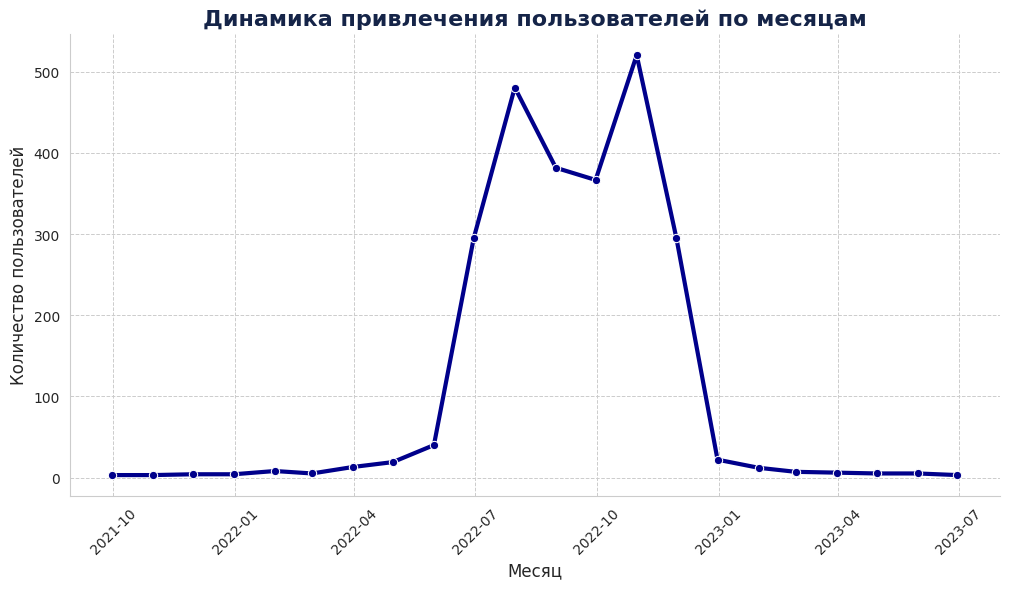

In [ ]:
# Группируем данные по месяцам и подсчитываем количество пользователей
monthly_user_counts = df_snake_case.resample('ME', on='join_date').size() # Где ME(Конец месяца)

# Создаем график
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_user_counts.index,
             y=monthly_user_counts.values,
             marker='o', color=contrast_colors[1], linewidth=3)  # Используем яркий цвет и жирную линию для графика

# Настройка графика
plt.title('Динамика привлечения пользователей по месяцам', fontsize=16, fontweight='bold', color=contrast_colors[0])
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid(visible=True, linestyle='--', linewidth=0.7)  # Добавляем сетку с пунктирной линией

# Убираем рамки графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Отображаем график
plt.show()


Вывод по динамике привлечения пользователей:

---
Данные показывают, что начальная фаза привлечения пользователей была медленной, но последующий рост был резким и вероятно был вызван изменениями в стратеги.
Падение регистрации в 2023 году указывает на возможные проблемы, которые требуют дальнейшего анализа для выявлеения причины снижения интереса к продукту и корректировки стратегий маркетинга и привлечения.

**Рекомендации:**

- Провести анализ причины снижения регистрации пользователей в 2023 году.
- Оценить эффективность проводимых маркетинговых кампаний в 2022 году, которые привели к росту.
- Рассмотрите возможность создания новых функций или улучшений продукта для привлечения и удержания пользователей.

##8 . Динамика выручки сервиса

Для изучения динамики дохода сервиса за основу возьмем данные о дате регистрации пользователей (дата присоединения) и дате последнего платежа и проведем анализ выручки по месяцам в расчитанном периоде. Так же сопоставим с количеством пользователей каждого месяца.

Для этой цели определим:
- месяца использования сервиса как разность дат между последним платежом и датой присоединения;
- суммы выручки каждого месяца у пользователя по сумме ежемесячной выручка;
- количество пользователей каждого месяца


###8.1. Статистические данные по выручки

In [ ]:
# Создаем список для хранения данных по выручке каждого клиента за каждый месяц
revenue_data = []

# Проходим по каждому клиенту и добавляем данные о выручке за каждый месяц
# Используем колонку 'months_between' из df_snake_case для анализа по типам подписки - ВЫЧИСЛЕННЫЙ РАНЕЕ ПРИ ПОДГОТОВКЕ ФАЙЛА
for _, row in df_snake_case.iterrows():
    for month in row['months_between']:  # Используем вычисленные месяцы
        revenue_data.append({'date': month, 'user_id': row['user_id'], 'revenue': row['monthly_revenue']})

# Создаем DataFrame из списка revenue_data
revenue_df = pd.DataFrame(revenue_data)

# Группируем данные по месяцам для расчета общей выручки и количества пользователей
monthly_stats = revenue_df.groupby('date').agg(
    total_revenue=('revenue', 'sum'),
    user_count=('user_id', 'nunique')
).reset_index()

# Добавляем колонку с накопительной выручкой
monthly_stats['cumulative_revenue'] = monthly_stats['total_revenue'].cumsum()

# Выводим результат
print("Статистика по ежемесячной выручке, количеству пользователей и накопительной выручке:\n")
display(monthly_stats)


Статистика по ежемесячной выручке, количеству пользователей и накопительной выручке:



,date,total_revenue,user_count,cumulative_revenue
0,2021-10,39,3,39
1,2021-11,78,6,117
2,2021-12,124,10,241
3,2022-01,176,14,417
4,2022-02,274,22,691
5,2022-03,363,29,1054
6,2022-04,497,40,1551
7,2022-05,738,59,2289
8,2022-06,1274,102,3563
9,2022-07,5189,413,8752


###8.2. Визуализация ежемесячной выручки и количества пользователей сервисом

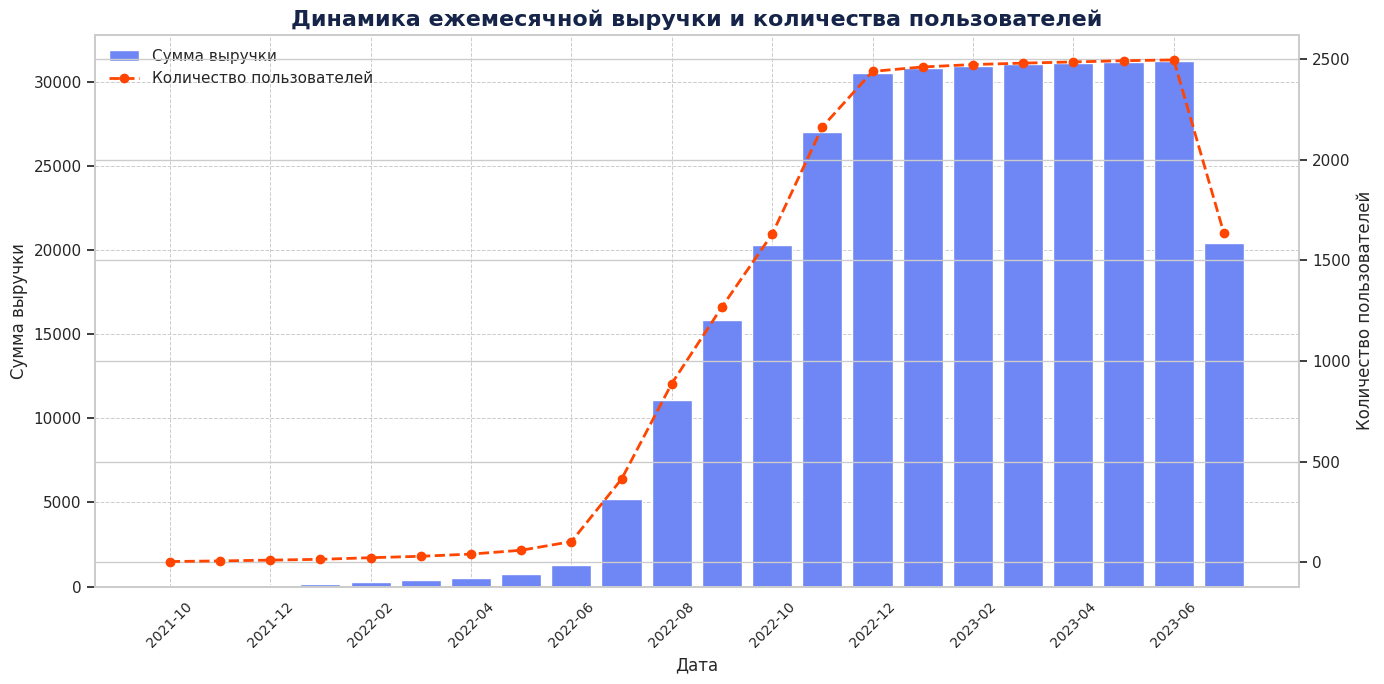

In [ ]:
# Устанавливаем стиль графиков
sns.set(style='whitegrid')

# Подготовка графика, создаем оси и фигуру
fig, ax1 = plt.subplots(figsize=(14, 7))

# Столбчатая диаграмма для суммы выручки за месяц
bar_width = 0.8
bars = ax1.bar(
    monthly_stats['date'],
    monthly_stats['total_revenue'],  # Сумма выручки
    color=contrast_colors[5],  # Выберем цвет столбчатой диаграммы
    label='Сумма выручки',
    width=bar_width
)

# Вторичная ось для отображения количества пользователей
ax2 = ax1.twinx()
line, = ax2.plot(  # Извлекаем только первую линию из возвращаемого кортежа
    monthly_stats['date'],
    monthly_stats['user_count'],  # Количество пользователей
    color='orangered',  # Явно укажим иной контрастный цвет для другого графика
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Количество пользователей'
)

# Настройка графика
ax1.set_title('Динамика ежемесячной выручки и количества пользователей', fontsize=16, fontweight='bold', color=contrast_colors[0])
ax1.set_xlabel('Дата', fontsize=12)
ax1.set_ylabel('Сумма выручки', fontsize=12)
ax2.set_ylabel('Количество пользователей', fontsize=12)

# Добавляем легенду
ax1.legend([bars, line], ['Сумма выручки', 'Количество пользователей'], loc='upper left', frameon=False)

# Настройка меток по оси X с шагом через одну метку
ax1.set_xticks(monthly_stats['date'][::2])  # Отображаем метки через одну
ax1.set_xticklabels(monthly_stats['date'][::2], rotation=45, fontsize=10) # Устанавливаем формат

# Добавляем сетку с пунктирной линией
ax1.grid(visible=True, linestyle='--', linewidth=0.7)

# Подгоняем макет
plt.tight_layout()
plt.show()


###8.3. Визуализация накопленной выручки

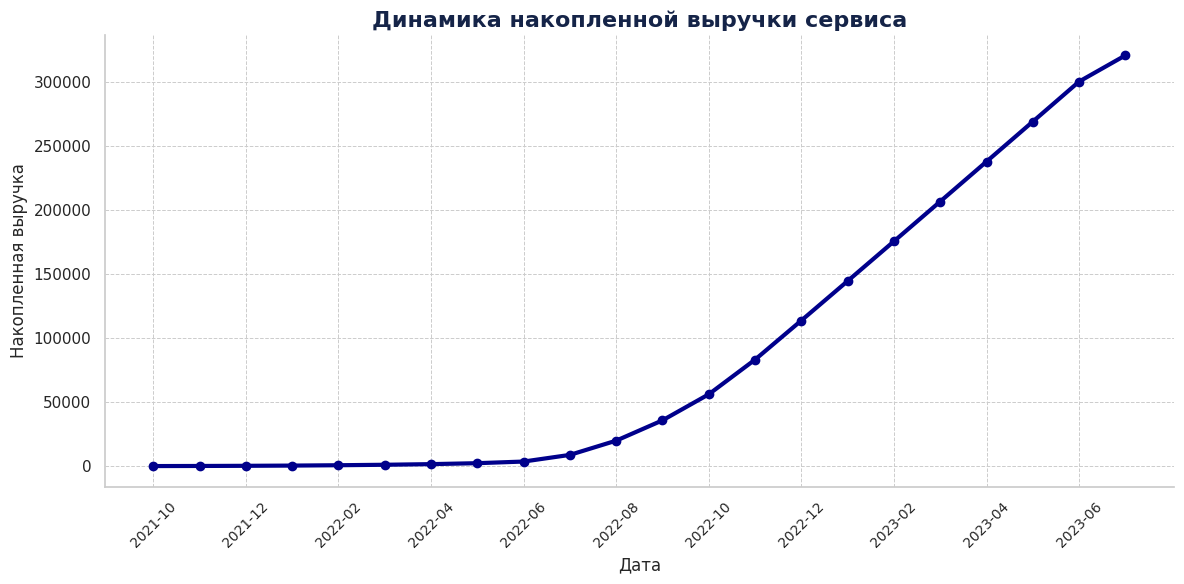

In [ ]:
# Вычисляем накопленную выручку
monthly_stats['cumulative_revenue'] = monthly_stats['total_revenue'].cumsum() # Получено выше при расчете статистических данных

# Визуализация накопленной выручки
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_stats['date'], monthly_stats['cumulative_revenue'],
        marker='o', color=contrast_colors[1], linewidth=3)  # Используем яркий цвет для линии

# Устанавливаем заголовок графика
plt.title('Динамика накопленной выручки сервиса', fontsize=16, fontweight='bold', color=contrast_colors[0])

# Настройки осей
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Накопленная выручка', fontsize=12)

# Настройка меток по оси X с шагом через одну метку
ax.set_xticks(range(0, len(monthly_stats['date']), 2))  # Шаг 2 для меток
ax.set_xticklabels(monthly_stats['date'][::2], rotation=45, fontsize=10)

# Добавляем сетку с пунктирной линией
ax.grid(visible=True, linestyle='--', linewidth=0.7)

# Убираем верхнюю и правую рамки графика
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Подгоняем макет
plt.tight_layout()
plt.show()


**Вывод по динаамике выручки сервиса:**

---
На основе представленных данных о ежемесячной выручке и количестве пользователей можно выделить несколько ключевых моментов:

Рост доходов и пользователей :

- С июня 2021 года по август 2022 года наблюдается устойчивый рост как доходов, так и количества пользователей. В частности, доход увеличился с 39 до 15 566, а количество пользователей выросло с 3 до 1 243.
Наибольший рост показателей производительности в феврале 2022 года, когда он достиг 1177, что также соответствует рекордному количеству пользователей (95).

- Наивысшая выручка была зафиксирована в декабре 2022 года, составив 29 621, с максимальным использованием пользователей — 2 368. Это свидетельствует об успешных продажах в предновогодний период, когда клиенты могли совершать больше покупок.

- Снижение выручки в 2023 году :
С начала 2023 года наблюдается постепенное снижение как выручки, так и количества пользователей. Особенно заметно снижение в летние месяцы, когда выручка упала до 10 325 в июле и 7 804 в августе.
В октябре 2023 года доход составил 4314, количество пользователей снизилось до 346. Это может свидетельствовать о сезонных колебаниях или временных проблемах в бизнесе.

- Общий тренд :
Несмотря на снижение в 2023 году, общая тенденция роста в период с 2021 по 2022 год свидетельствует о том, что бизнес добился значительных успехов, привлекая все большее количество пользователей и увеличивая доход.

*Рекомендации:*
- Анализ причин снижения : следует провести детальный анализ причин снижения выручки и количества пользователей в 2023 году, возможно, это связано с изменениями в рыночной среде, конкурентами или переменными факторами.
- Маркетинговые стратегии : Разработка новых маркетинговых стратегий для привлечения пользователей, особенно в месяцы с низким доходом.
- Улучшение клиентского сервиса : повышение уровня обслуживания клиентов может помочь удержать существующих пользователей и привлечь новых.

Данные показывают, что компания обладает потенциалом для роста, и с такими стратегиями возможно восстановление и дальнейшее развитие.








##9 . Анализ платежеспособности возрастных групп

Для анализа платежеспособности клиентов по возрастным группам, сначала разобьем клиентов по возрастным корзинам, затем посчитаем выручку для каждой группы и определим наиболее платежеспособную. Визуализируем это с помощью круговой диаграммы.

Численность пользователей по возрастным группам:
  возрастная_группа  количество_пользователей
0  группа 26-35 лет                       811
1  группа 36-45 лет                      1015
2  группа 46-55 лет                       674

Общее количество клиентов: 2500


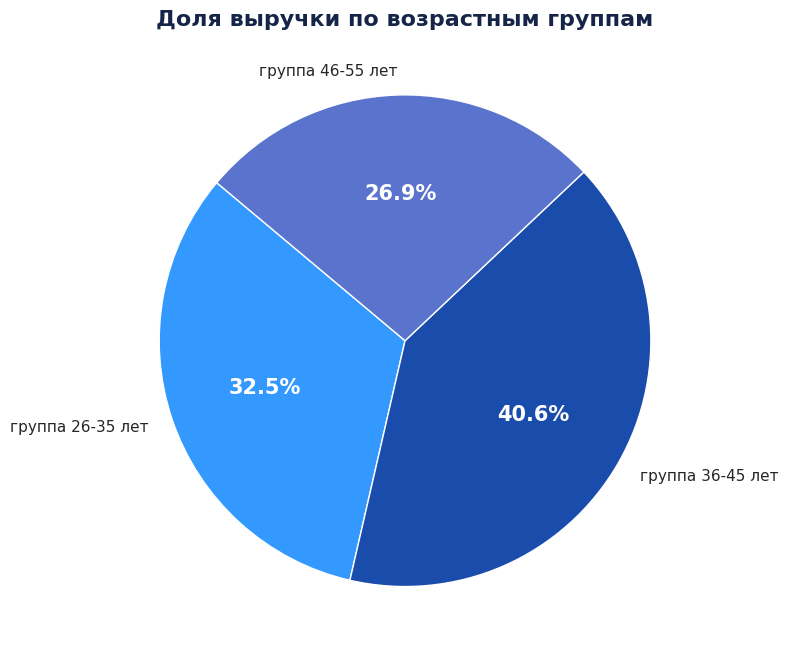

In [ ]:
# Определим корзины по возрасту
age_bins = [18, 25, 35, 45, 55, 100]
age_labels = ['группа 18-25 лет', 'группа 26-35 лет', 'группа 36-45 лет', 'группа 46-55 лет', 'группа 56+ лет']

# Добавляем колонку с возрастной группой в исходные данные
df_snake_case['возрастная_группа'] = pd.cut(df_snake_case['age'], bins=age_bins, labels=age_labels, right=False)

# Группировка данных по возрастной группе и расчет выручки и количества пользователей
age_revenue_stats = df_snake_case.groupby('возрастная_группа', observed=True).agg(
    общая_выручка=('monthly_revenue', 'sum'),
    количество_пользователей=('user_id', 'count')  # Подсчет пользователей в каждой группе
).reset_index()

# Данные для круговой диаграммы
labels = age_revenue_stats['возрастная_группа']
sizes = age_revenue_stats['общая_выручка']

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
# Создаем круговую диаграмму
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
                                     colors=[contrast_colors[6], contrast_colors[2], contrast_colors[4],
                                             contrast_colors[3], contrast_colors[1]])

plt.title('Доля выручки по возрастным группам', fontsize=16, fontweight='bold', color=contrast_colors[0])

# Улучшаем читаемость надписей
for text in autotexts:
    text.set_color('white')  # Устанавливаем цвет текста в графике - белый
    text.set_fontweight('bold')  # Жирный шрифт
    text.set_fontsize(15)

# Вывод численности пользователей по группам
print("Численность пользователей по возрастным группам:")
print(age_revenue_stats[['возрастная_группа', 'количество_пользователей']])

# Вывод общего количества клиентов
total_clients = df.shape[0]  # Общее количество строк в DataFrame
print(f"\nОбщее количество клиентов: {total_clients}")

# Подгоняем макет
plt.tight_layout()
plt.show()


**Вывод по платежеспособности возрастных групп:**

---
Общая структура пользователей :

Всего пользователей: 2500 . Из них:
- 811 (32,4%) относятся к возрастной группе 25-34 лет .
- 1015 (40,6%) составляют возрастную группу 35-44 года .
- 674 (27,0%) относятся к возрастной группе 45-54 лет .

В возрастной группе 18-24 и 55-64 пользователей нет, что свидетельствует об отсутствии интереса к подпискам среди молодых и платных клиентов.

Анализ платежеспособности
Наибольшее количество пользователей (1015) сосредоточено в возрастной группе 36-45 лет . Это указывает на то, что банковская группа является наиболее активной в плане подписок и платежей.

Группа 26–35 лет также имеет количество пользователей (811), что говорит о наличии потенциальных клиентов, которые могут повысить свою платежеспособность в течение определенного времени.

Группа 46-55 лет (674 пользователя) имеет наименьшее количество, что может привести к более низкой активности или интересу к продуктам, предлагаемым сервисом.

Рекомендации по маркетинговой стратегии:
- Учитывая, что самая большая группа пользователей находится в возрасте 36-45 лет, следует направить усилия на удержание и дальнейшее привлечение клиентов этой категории.
- Для 26-35 лет можно разнообразить дополнительные акции и предложения, которые помогут повысить их активность.
- Рассмотреть возможность улучшения маркетинговых стратегий для увеличения количества пользователей в возрасте 18–24 и 55–64 лет

##10 . Зависимость типа тарифа от группы возраста пользователя

Названия типов подписки: Index(['Базовый', 'Премиум', 'Стандарт'], dtype='object', name='subscription_type')
subscription_type         age_group  Базовый  Премиум  Стандарт
0                  группа 18-25 лет        0        0         0
1                  группа 26-35 лет      320      253       238
2                  группа 36-45 лет      402      286       327
3                  группа 46-55 лет      277      194       203
4                    группа 56+ лет        0        0         0


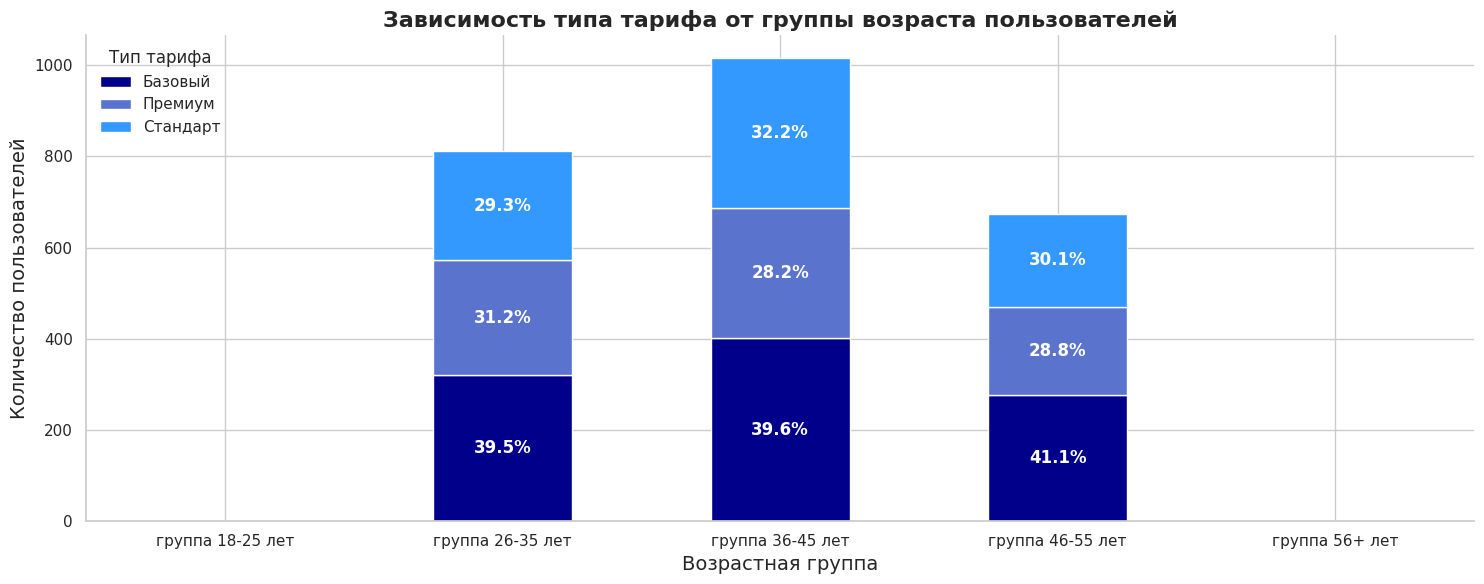

In [ ]:
# Добавляем колонку с возрастной группой в исходные данные
df_snake_case['age_group'] = pd.cut(df_snake_case['age'], bins=age_bins, labels=age_labels, right=False)

# Создаем сводную таблицу для подсчета пользователей по возрастной группе и типу тарифа
age_subscription_stats = pd.pivot_table(df_snake_case,
                                         index='age_group',
                                         columns='subscription_type',
                                         values='user_id',
                                         aggfunc='count',
                                         fill_value=0,
                                         observed=False).reset_index()

# Определяем цвета для типов подписки
color_mapping = {
    'Базовый': contrast_colors[1],
    'Стандарт': contrast_colors[6],
    'Премиум': contrast_colors[4]
}

# Выводим названия типов подписки для отладки
print("Названия типов подписки:", age_subscription_stats.columns[1:])  # Проверяем названия

# Создаем цветовой список для каждой возрастной группы
age_subscription_stats_colors = [color_mapping.get(col, 'gray') for col in age_subscription_stats.columns[1:]]

# Визуализация
ax = age_subscription_stats.plot(kind='bar', stacked=True, figsize=(15, 6), color=age_subscription_stats_colors)

plt.title('Зависимость типа тарифа от группы возраста пользователей', fontsize=16, fontweight='bold')
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)

# Установка меток оси X
ax.set_xticklabels(age_subscription_stats['age_group'], rotation=0)

# Надписи внутри графика в процентах
total_counts = age_subscription_stats.iloc[:, 1:].sum(axis=1)

for i, row in enumerate(age_subscription_stats.iloc[:, 1:].values):
    for j, value in enumerate(row):
        if total_counts[i] > 0:
            percentage = (value / total_counts[i]) * 100
            plt.text(i, value / 2 + sum(row[:j]), f'{percentage:.1f}%', ha='center', va='center',
                     fontweight='bold', color='white')

# Переносим легенду в верхний левый угол
plt.legend(title='Тип тарифа', bbox_to_anchor=(0, 1), loc='upper left', frameon=False)

# Убираем рамку графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Вывод результатов
print(age_subscription_stats)

# Подгоняем макет
plt.tight_layout()
plt.show()


**Вывод по зависимости тарифа от возрастной группы пользователей:**

---

- Возрастные группы 26-55 лет :

Основная часть пользователей сосредоточена в возрастных группах 26-35 , 36-45 и 46-55 лет .

- Базовый таоиф оказался наиболее популярным, особенно в группе 36-45 лет (402 пользователя).

- Стандартный тариф также имеет преимущество, особенно среди пользователей в возрасте 36–45 лет (327 пользователей), хотя его показатели близки к премиуму и базовому тарифу в других возрастных группах.

- Премиум- тариф несколько отстает по популярности от стандартного, однако сохраняет высокий интерес у пользователей в группах 26-35 (253 пользователя) и 36-45 лет (286 пользователей).

- Возрастные группы 18-25 и 56+ лет :   В группах 18-25 и 56+ лет пользователей нет, что говорит о низкой заинтересованности данных возрастных групп в данном сервисе или его тарифах.

Этот факт может сигнализировать о необходимости дополнительных исследований для определения, почему именно в этих возрастных категориях отсутствуют пользователи.

*Общие выводы:*
Возрастная группа категории 36-45 лет представляет собой наиболее платежеспособную среди пользователей, так как они активно используют все три типа подписок.
Базовый тариф остается популярным среди всех возрастных групп от 26 до 55 лет, что может свидетельствовать о его настройке доступности для некоторых пользователей.

На основе данных можно усилить маркетинговые стратегии, ориентированных на привлечение пользователей младше 25 лет и старше 55 лет, что может гарантировать увеличение охвата сервиса.







##11 . Зависимость типа тарифа от страны пользователя

Чтобы оценить зависимость типа тарифа от страны пользователя, можно использовать аналогичный подход, как в предыдущем анализе с возрастными подтверждениями. Мы создаем сводную таблицу и построим столбчатую диаграмму с заданными цветами.

subscription_type         country  total_users  Базовый  Стандарт  Премиум
7                         Испания          451      110       129      212
9                             США          451      199       107      145
2                          Канада          317      145        84       88
0                       Австралия          183       31        51      101
1                        Бразилия          183      146         4       33
3                         Франция          183       36         0      147
4                        Германия          183      149        31        3
5                          Италия          183      176         3        4
6                         Мексика          183        4       179        0
8                  Великобритания          183        3       180        0


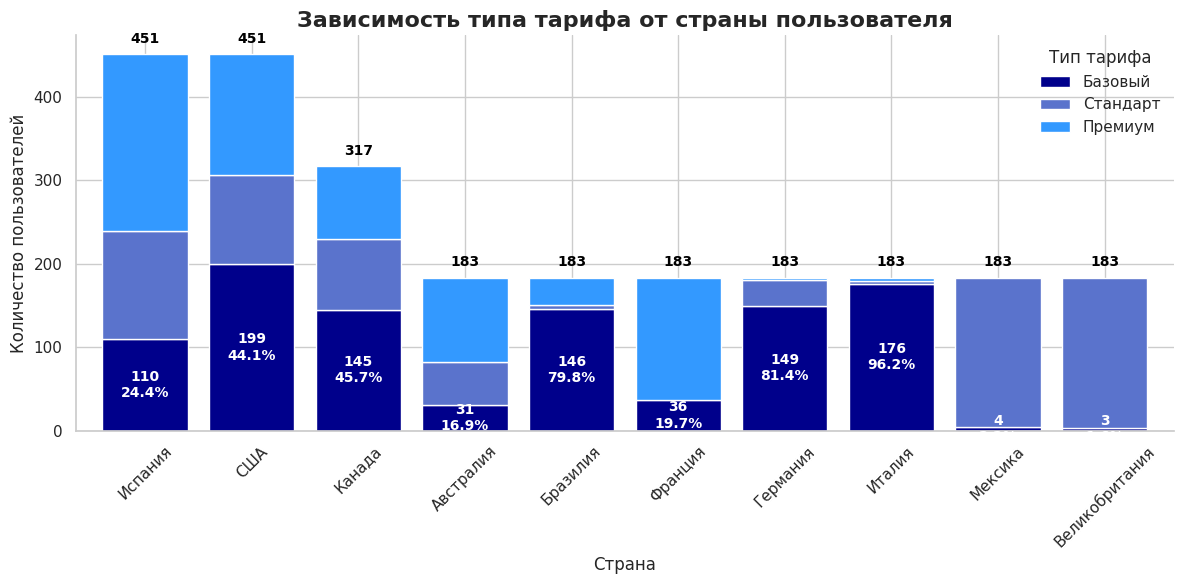

In [ ]:
# Создаем сводную таблицу для подсчета пользователей по стране и типу тарифа
country_subscription_stats = pd.pivot_table(df_snake_case,
                                            index='country',
                                            columns='subscription_type',
                                            values='user_id',
                                            aggfunc='count',
                                            fill_value=0).reset_index()

# Преобразуем названия стран и типов подписки на русский
country_translation = {
    'United States': 'США',
    'Spain': 'Испания',
    'Canada': 'Канада',
    'United Kingdom': 'Великобритания',
    'Australia': 'Австралия',
    'Germany': 'Германия',
    'France': 'Франция',
    'Brazil': 'Бразилия',
    'Mexico': 'Мексика',
    'Italy': 'Италия'
}
type_translation = {'Basic': 'Базовый', 'Standard': 'Стандарт', 'Premium': 'Премиум'}
country_subscription_stats['country'] = country_subscription_stats['country'].map(country_translation)
country_subscription_stats = country_subscription_stats.rename(columns=type_translation)

# Добавляем столбец с общей численностью пользователей по каждой стране и сортируем
country_subscription_stats['total_users'] = country_subscription_stats.iloc[:, 1:].sum(axis=1)
country_subscription_stats = country_subscription_stats.sort_values(by='total_users', ascending=False)

# Определяем цвета для каждого типа подписки
color_mapping = {
    'Базовый': contrast_colors[1],
    'Стандарт': contrast_colors[6],
    'Премиум': contrast_colors[4]
}
colors = [color_mapping.get(col, 'gray') for col in country_subscription_stats.columns[1:-1]]

# Параметр для выбора отображаемого тарифа
selected_subscription = 'Базовый'  # Замените на нужный тариф ('Базовый', 'Стандарт', 'Премиум')

# Построение графика
ax = country_subscription_stats.plot(kind='bar', x='country', y=list(type_translation.values()), stacked=True,
                                     figsize=(12, 6), color=colors, width=0.8)

# Настройки графика
plt.title('Зависимость типа тарифа от страны пользователя', fontsize=16, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)  # Поворачиваем метки оси X для лучшей читаемости

# Отображение только выбранной подписки и общего количества пользователей
for i, row in enumerate(country_subscription_stats[list(type_translation.values())].values):
    max_value_index = list(type_translation.values()).index(selected_subscription)
    selected_value = row[max_value_index]
    total = country_subscription_stats['total_users'].iloc[i]

    # Выводим общее количество пользователей над каждым столбцом
    plt.text(i, total + 10, f'{total}', ha='center', va='bottom', fontweight='bold', fontsize=10, color='black')

    # Выводим процент и количество для выбранного тарифа
    if total > 0:
        percentage = (selected_value / total) * 100
        plt.text(i, selected_value / 2 + sum(row[:max_value_index]),
                 f'{int(selected_value)}\n{percentage:.1f}%',
                 ha='center', va='center', fontweight='bold', color='white', fontsize=10)

# Переносим легенду в правый верхний угол, убираем рамку
plt.legend(title='Тип тарифа', bbox_to_anchor=(1, 1), loc='upper right', frameon=False)

# Убираем рамку графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Выводим результаты
print(country_subscription_stats[['country', 'total_users'] + list(type_translation.values())])

# Отображаем график
plt.tight_layout()
plt.show()


**Вывод по зависимости типа тарифа от страны пользователя:**

---
- В настоящее время преобладает базовый тариф, в то время как стандартный и премиум-подписки распределяются почти равномерно, с небольшим преимуществом в сторону премиум-подписки.
- Во Франции и Австралии наблюдается высокий интерес к премиум-подписке
- В Германии и Италии большинство пользователей отдают предпочтение базовому тарифу, что говорит о более высокой востребованности этого тарифа в этих странах.
- В Мексике и Великобритании преобладают подписки по стандартному тарифу, при этом количество пользователей по минимальному премиум-тарифу или отсутствует.

**Общие выводы:**
- В странах, где базовый тариф предпочитают большинство (например, Германия, Италия, Бразилия), возможно, пользователи склонны выбирать более экономичные решения.
- В настоящее время премиум-подписка более популярна в странах с высоким доходом, таких как Франция и Австралия.



---


#**Раздел 4: Общие выводы и закономерности**

---



1. **Рост выручки и пользователей:**  
   - С июня 2021 года по август 2022 года наблюдается устойчивый рост как доходов, так и количества пользователей. Наивысшая выручка была зафиксирована в декабре 2022 года.

2. **Снижение выручки в 2023 году:**  
   - С начала 2023 года отмечается постепенное снижение выручки и числа пользователей, особенно в летние месяцы. В октябре 2023 года доход и количество пользователей значительно упали.

3. **Анализ платежеспособности по возрастным группам:**  
   - Наибольшее количество пользователей сосредоточено в возрасте 36-45 лет, что указывает на их высокую активность и платежеспособность. Возрастные группы 18-24 и 55-64 не представлены, что сигнализирует о низком интересе к подпискам в этих категориях.

4. **Предпочтения по типу подписки:**  
   - Базовая подписка является наиболее популярной среди всех возрастных групп от 26 до 55 лет, тогда как стандартная и премиум подписки имеют схожие показатели, но с меньшей активностью.

5. **Зависимость типа тарифа от страны пользователя:**  
   - В странах с высоким доходом, таких как Франция и Австралия, наблюдается больший интерес к премиум-подписке, в то время как в таких как Германия и Италия, пользователи предпочитают базовые тарифы.

6. **Девайсы пользователей:**  
   - Наиболее популярные устройства для доступа к сервису — ноутбуки и планшеты. Это может свидетельствовать о предпочтении пользователей к большему экрану для просмотра контента и их мобильности в силу возраста.

7. **Необходимость анализа причин снижения:**  
   - Рекомендуется провести детальный анализ причин снижения выручки и количества пользователей в 2023 году, чтобы понять влияние сезонных колебаний или изменений в рыночной среде.

8. **Рекомендации по маркетинговым стратегиям:**  
   - Учитывая популярность возрастной группы 36-45 лет, необходимо разработать стратегии для удержания и привлечения клиентов этой категории, а также улучшить маркетинг для пользователей 18-24 и 55-64 лет.

9. **Нехватка пользователей в некоторых возрастных группах:**  
   - Отсутствие пользователей в группах 18-25 и 56+ лет может свидетельствовать о необходимости дополнительных исследований для определения причин низкого интереса к сервису.

10. **Общая тенденция роста:**  
    - Несмотря на снижение в 2023 году, общая тенденция роста в период с 2021 по 2022 год указывает на успешное привлечение пользователей и увеличение дохода, что дает основание для дальнейшего развития бизнеса.